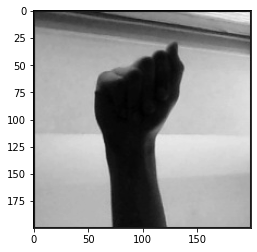

In [0]:
#reeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "D:/asl_ml/asl_alphabet_train/asl_alphabet_train"
CATEGORIES = ['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

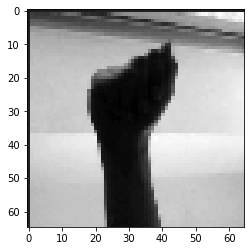

In [0]:
IMG_SIZE = 65

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [0]:
training_data =[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
            
            
create_training_data()

In [0]:
import random

random.shuffle(training_data)

In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) #64 units, 3 by 3 window
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(29))
model.add(Activation('softmax'))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

model.fit(X, y, batch_size = 100, epochs = 20, validation_split = 0.1)

model.save('64x3-CNN.model')

Train on 78300 samples, validate on 8700 samples
Epoch 1/20
78300/78300 [==============================] - 34429s 440ms/sample - loss: 0.8673 - accuracy: 0.7443 - val_loss: 0.1898 - val_accuracy: 0.9384
Epoch 2/20
78300/78300 [==============================] - 236s 3ms/sample - loss: 0.0985 - accuracy: 0.9705 - val_loss: 0.0707 - val_accuracy: 0.9826
Epoch 3/20
78300/78300 [==============================] - 233s 3ms/sample - loss: 0.0548 - accuracy: 0.9857 - val_loss: 0.0565 - val_accuracy: 0.9809
Epoch 4/20
78300/78300 [==============================] - 233s 3ms/sample - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.0214 - val_accuracy: 0.9947
Epoch 5/20
78300/78300 [==============================] - 233s 3ms/sample - loss: 0.0355 - accuracy: 0.9903 - val_loss: 0.0438 - val_accuracy: 0.9860
Epoch 6/20
78300/78300 [==============================] - 233s 3ms/sample - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0452 - val_accuracy: 0.9890
Epoch 7/20
78300/78300 [=======================